# TI3130: Regression Lab &mdash; Exercises (variant B)
**Julián Urbano &mdash; December 2021**

In [2]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
import statsmodels.api as sm
import statsmodels.formula.api as smf

print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__,
      "\nstatsmodels", sm.__version__)

python 3.9.9 (tags/v3.9.9:ccb0e6a, Nov 15 2021, 18:08:50) [MSC v.1929 64 bit (AMD64)] 
numpy 1.21.4 
pandas 1.3.4 
plotnine 0.8.0 
statsmodels 0.13.1


For these exercises we will use the _Amsterdam Lite_ dataset, the _Advertising_ dataset, and the _Wages_ dataset. Please refer to their HTML files for a description of the variables.

**Slide numbers refer to the page of the slides PDF, not the recordings.** Page _Lx_ refers to page _x_ of the _The Linear Model_ lecture. Page _Rx_ refers to page _x_ of the _Regression_ lecture.

In [3]:
ams = pd.read_csv('amsterdam_lite.csv')
adv = pd.read_csv('advertising.csv')
wage = pd.read_csv('wages.csv')

**a) Fit a model of `sales` by `newspaper`, and report the results as in slide L15 (the coefficients and the three plots). Based on these results, describe two differences with respect to the model in the slide.**

Coefficients: intercept = 12.3514, newspaper = 0.0547. One difference between the model in the slide and our model is that the residuals in our model don't follow a symmetric distribution. Another difference is that the residuals seem to be less heteroskedastic in our model. Finally, our model seems to explain the sales variable poorer than the model from the slides, i.e., our $R^2$ is very low. 

In [25]:
g = ggplot(adv, aes('newspaper', 'sales')) + \
    geom_point()
m = smf.ols('sales ~ newspaper', adv).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 15 Dec 2021   Prob (F-statistic):            0.00115
Time:                        14:49:59   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

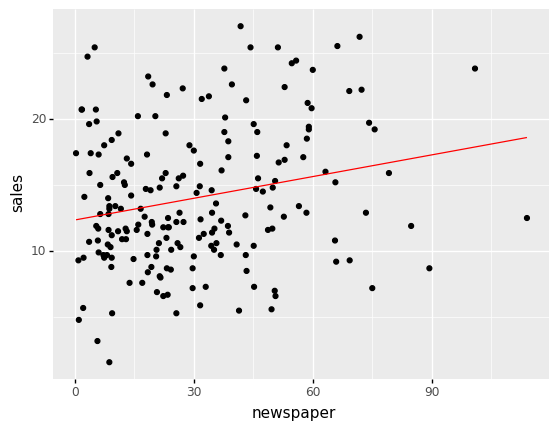

<ggplot: (146981352027)>

In [26]:
d = adv.assign(_resid = m.resid, _fitted = m.fittedvalues)
g + geom_line(aes(y = '_fitted'), data = d, color = 'red')

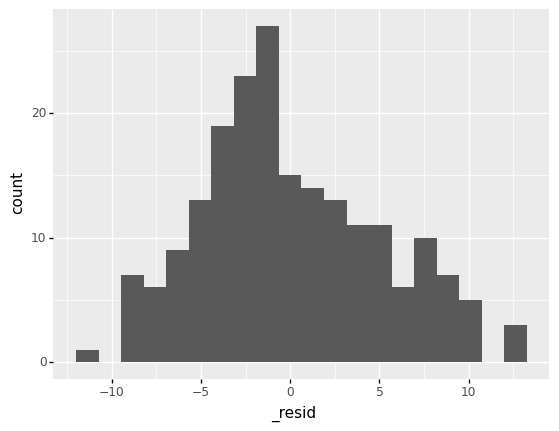

<ggplot: (146979774799)>

In [27]:
ggplot(d, aes('_resid')) +\
    geom_histogram(bins=20)

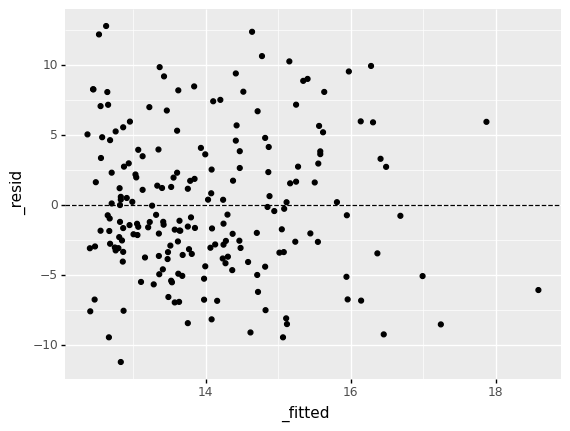

<ggplot: (146981464814)>

In [28]:
ggplot(d, aes('_fitted', '_resid')) +\
    geom_point() +\
    geom_hline(yintercept = 0, linetype = 'dashed')

**b) Make the two plots in slide L21 with the `sales` and `newspaper` variables. You only need to show the two blue lines and the two red lines, with no text annotations. Plotnine's [`geom_abline`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_abline.html) will be helpful.**

In [41]:
m_alt = smf.ols('newspaper ~ sales', adv).fit()
m_alt.summary()
a, b = m.params
a_alt, b_alt = m_alt.params

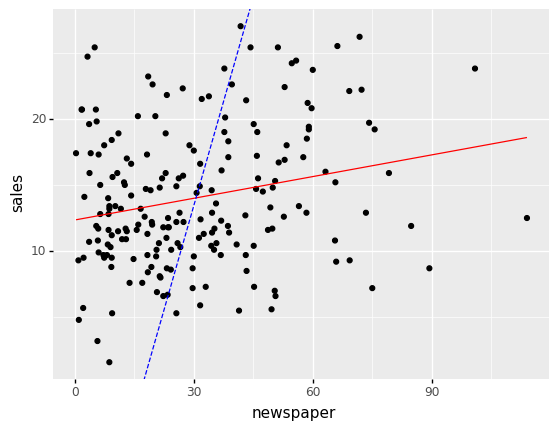

<ggplot: (146980005446)>

In [49]:
d = adv.assign(_resid = m.resid, _fitted = m.fittedvalues)
g + geom_line(aes(y = '_fitted'), data = d, color = 'red') +\
geom_abline(aes(intercept = -a_alt/b_alt, slope=1/b_alt), color='blue', linetype='dashed')

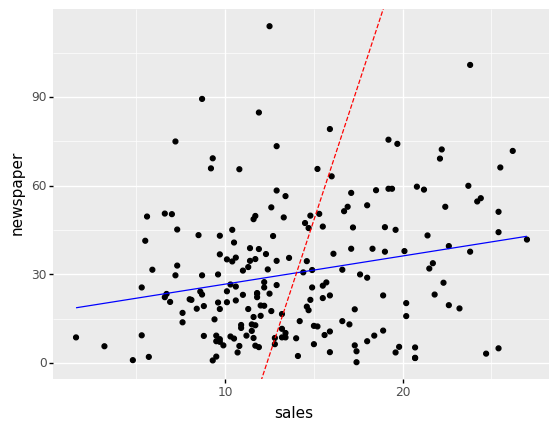

<ggplot: (146979998868)>

In [50]:
g_alt = ggplot(adv, aes('sales', 'newspaper')) + \
    geom_point()
d_alt = adv.assign(_resid = m_alt.resid, _fitted = m_alt.fittedvalues)
g_alt + geom_line(aes(y = '_fitted'), data = d_alt, color = 'blue') +\
geom_abline(aes(intercept = -a/b, slope=1/b), color='red', linetype='dashed')

**c) Reproduce the plot in slide L49, also including the simple linear model in black. Don't worry about the _x_-axis extending until 0.**

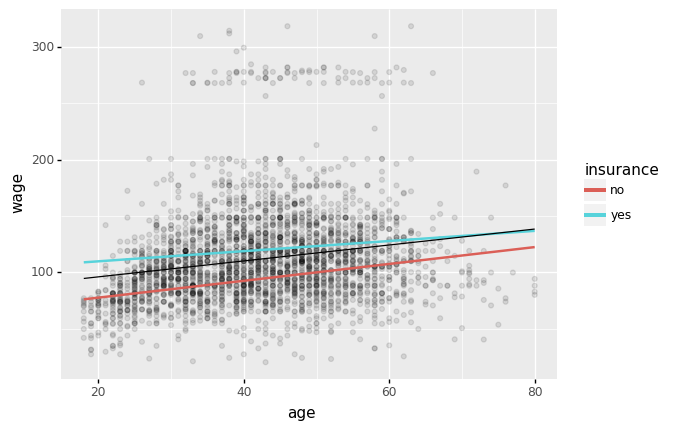

<ggplot: (146985041987)>

In [62]:
m = smf.ols('wage ~ age + insurance + age:insurance', wage).fit()
m.summary()
d = wage.assign(_resid = m.resid, _fitted = m.fittedvalues)

m_simple = smf.ols('wage ~ age', wage).fit()
m_simple.summary()
d_simple = wage.assign(_resid = m_simple.resid, _fitted = m_simple.fittedvalues)

g = ggplot(wage, aes('age', 'wage')) + \
    geom_point(alpha = 0.1)

g + geom_line(aes(y = '_fitted', colour = 'insurance'), data = d, size = 1) + \
    geom_line(aes(y = '_fitted'), data = d_simple, color = 'black')

**d) Which factor has the largest effect on the `wage`: `education` or `jobclass`? Use a linear model to answer the question.**

Answer: as we can see in the OLS Regression Results, the difference between each of the education levels is greater than the difference between jobclass in magnitude. Furthermore, the differences between the education levels are 'more' significant than the jobclass levels as the absulute values of the t-statistics larger than the jobclass t-statistic. Therefore, the education has a greater effect on wage.

In [63]:
m = smf.ols('wage ~ education + jobclass', wage).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     187.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.38e-174
Time:                        15:52:17   Log-Likelihood:                -15041.
No. Observations:                3000   AIC:                         3.009e+04
Df Residuals:                    2994   BIC:                         3.013e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    87.9790      2.437     36.105      0.000      83.201      92.757
education[T.2.highschool]    11.3840      2.515      4.526      0.000       6.452      16.316
education[T.3.bachelor]      22.6521      2.658      8.524      0.000      17.441      27.863
education[T.4.master]        38.6350      2.661     14.520      0.000      33.418      43.852
education[T.5.phd]           64.2474      2.916     22.033      0.000      58.530      69.965
jobclass[T.industrial]       -5.4651      1.399     -3.907      0.000      -8.208      -2.723
==============================================================================
Omnibus:                      965.473   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4563.278
Skew:                           1.475   Prob(JB):                         0.00
Kurtosis:                       8.273   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**e) Build a logistic model to predict `unemployment` with `inc_gini` and `district`. Show the regression lines in both the link space and the response space, as we did in slide R54, using different colors for `district`s.**

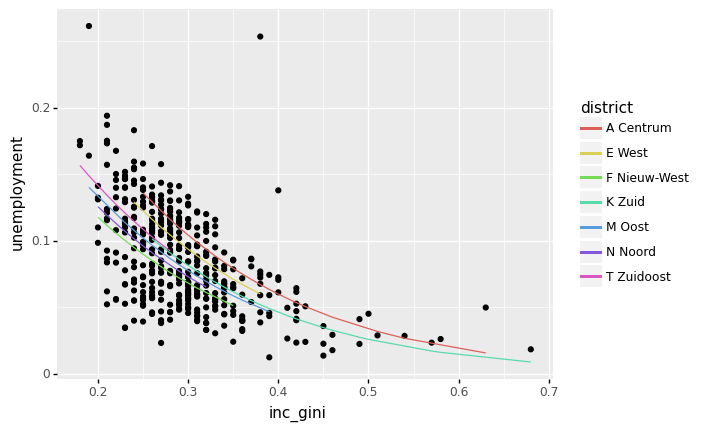

<ggplot: (146981209269)>

In [72]:
ams = ams.assign(unemployment = ams.pop_unemployed / ams.pop_total)
m = smf.glm('unemployment ~ inc_gini + district', ams, family = sm.families.Binomial()).fit()
m.summary()

d1 = ams.assign(_resid = m.resid_response, _fitted = m.fittedvalues)

ggplot(d1, aes('inc_gini', 'unemployment')) +\
  geom_point() +\
  geom_line(aes(y = '_fitted', colour = 'district'))

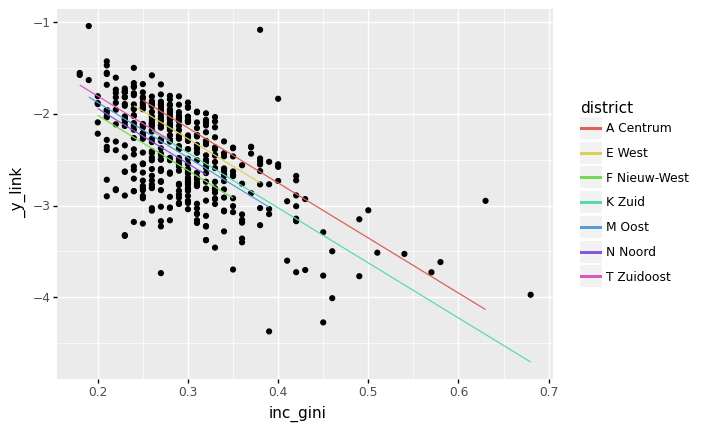

<ggplot: (146986698743)>

In [77]:
d2 = ams.assign(_resid = m.resid_response, _fitted = m.fittedvalues, \
               _y_link = m.family.link(ams['unemployment']), _fitted_link = m.family.link(m.fittedvalues))



ggplot(d2, aes('inc_gini', '_y_link')) +\
  geom_point() +\
  geom_line(aes(y = '_fitted_link', colour = 'district'))

**f) In the tutorial we fitted a logistic model `unemployment ~ I(1/inc_income)*spa_playing`, and plotted it in the response space. However, the regression lines did not span the whole range of `inc_income` because we plotted them only at observed values of `inc_income`. Make a new plot making sure the lines _do_ span the whole range. Functions [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [`pd.merge`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) (with a `cross` join) will be useful.**

**g) Fit a model to predict `wage` with `status` and `age`. Which group has a better salary according to the model, "married" or "separated"? Can we test whether this difference is statistically significant? If not, what do we need to change? See [here](https://www.statsmodels.org/stable/contrasts.html#treatment-dummy-coding) and [here](https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.Treatment).**

**h) Fit a model of `wage` by `insurance` and `jobclass`, including their interaction. According to the model, what are the mean salaries in each of the four combinations? Confirm this by comparing to the sample means.**

**i) Create an _unambiguous_ and _nontrivial_ question, and its corresponding solution, as if you were writing the set of exercises for the lab. The question must cover _at least 3_ of the following aspects:**

- **Diagnosing the model**
- **Interpreting coefficients or their precision**
- **Categorical predictors, interactions or transformations**
- **Analysis of Variance**
- **Logistic regression**
- **An open-ended question to explain some behavior**

**Please make it explicit which 3 of these aspects your question covers. You can use any of the datasets available on Brightspace.**